# Benchmark with the 20 newsgroups dataset

In [1]:
%matplotlib inline
import time
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_sparse_uncorrelated
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import LSHForest
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse import coo_matrix
import neighborsMinHash as kneighbors
from neighborsMinHash.util import create_dataset
from neighborsMinHash.util import create_dataset_fixed_nonzero
from neighborsMinHash.util import measure_performance
from neighborsMinHash.util import plotData


import random

from scipy.sparse import dok_matrix
from scipy.sparse import rand
from scipy.sparse import vstack

from sklearn.random_projection import SparseRandomProjection

import annoy

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
vectorizer = TfidfVectorizer()
vectors_training = vectorizer.fit_transform(newsgroups_train.data)

newsgroups_test = fetch_20newsgroups(subset='test',remove=('headers', 'footers', 'quotes'), categories=categories)
vectors_test = vectorizer.transform(newsgroups_test.data)

In [4]:
dimensions = [50, 100, 200, 400, 800, 1600, 3200, 6400, 12800]
projected_data = []
projected_data_test = []

for d in dimensions: 
    data_projection = SparseRandomProjection(n_components=d, random_state=1)
    projected_data.append(data_projection.fit_transform(vectors_training))
for d in dimensions: 
    data_projection = SparseRandomProjection(n_components=d, random_state=1)
    projected_data_test.append(data_projection.fit_transform(vectors_test))

In [5]:
n_neighbors_sklearn = 5
n_neighbors_minHash = 5
returnValuesBursi = measure_performance([vectors_training]*9, n_neighbors_sklearn, n_neighbors_minHash, number_of_hashfunctions=2500, dataset_dense=projected_data)

#### Query time: performe 50 times one query

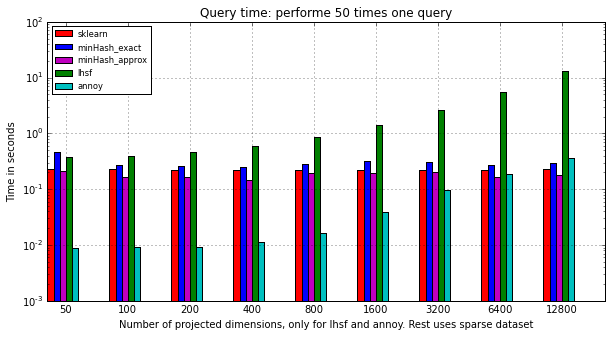

In [9]:
plotData(data=returnValuesBursi[4:9], color=["r", "b", "m", "g", "c"], label=["sklearn", "minHash_exact", "minHash_approx", "lhsf", "annoy"],
        xticks=["50", "100", "200", "400", "800", "1600", "3200", "6400", "12800"], ylabel="Time in seconds", 
         xlabel="Number of projected dimensions, only for lhsf and annoy. Rest uses sparse dataset", number_of_instances=9,
        number_of_features=1, title='Query time: performe 50 times one query')

#### Accuracy

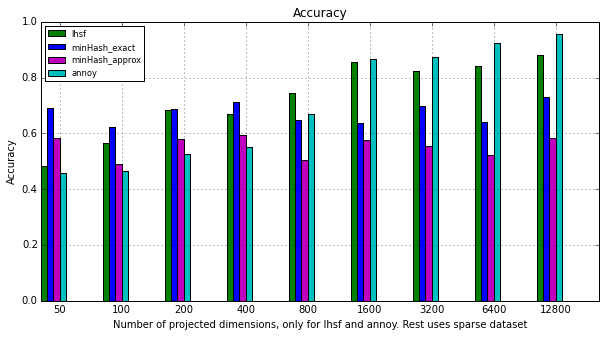

In [10]:
plotData(data=returnValuesBursi[13:], color=["g", "b", "m", "c"], label=["lhsf", "minHash_exact", "minHash_approx", "annoy"],
        xticks=["50", "100", "200", "400", "800", "1600", "3200", "6400", "12800"], 
         xlabel="Number of projected dimensions, only for lhsf and annoy. Rest uses sparse dataset",
         ylabel="Accuracy", number_of_instances=9,
        number_of_features=1, title='Accuracy', log=False)

#### Fitting time

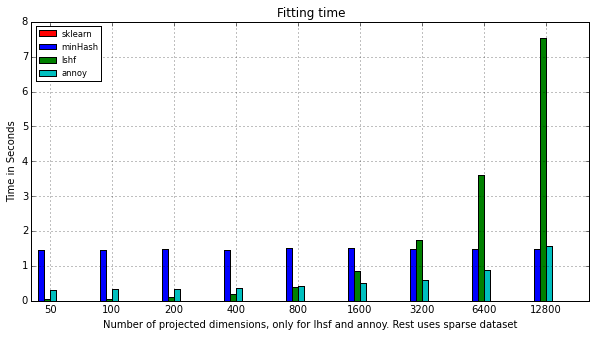

In [11]:
plotData(data=returnValuesBursi[:4], color=["r", "b", "g", "c"], label=["sklearn", "minHash", "lshf", "annoy"],
        xticks=["50", "100", "200", "400", "800", "1600", "3200", "6400", "12800"], 
         xlabel="Number of projected dimensions, only for lhsf and annoy. Rest uses sparse dataset",
         ylabel="Time in Seconds", number_of_instances=9,
        number_of_features=1, title='Fitting time', log=False)